### Libraries

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import TextVectorization, Embedding, Dense, LSTM, Bidirectional, Conv2D, MaxPooling2D, Flatten, Input, concatenate, Dropout, Normalization
from tensorflow.keras.losses import SparseCategoricalCrossentropy, BinaryCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.datasets import make_circles, make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sn

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 32
NUM_CLASS = 10

### Dummy Data for Perceptron

In [ ]:
X, y = make_blobs(n_samples=10000, centers=2, n_features=2)

In [ ]:
X, y = make_circles(n_samples=10000, factor=0.5, noise=0.05)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=12345)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=12345)

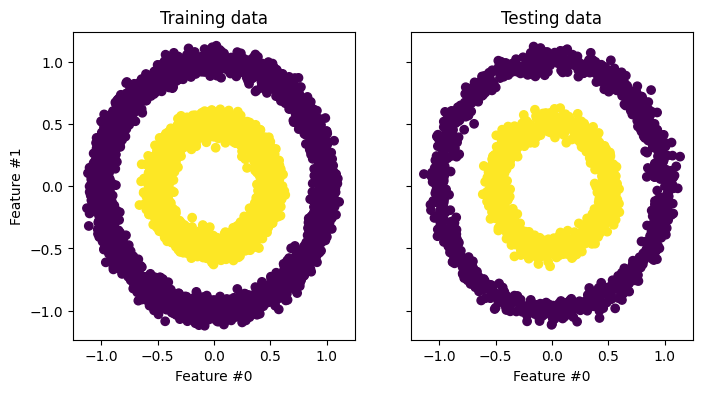

In [ ]:
_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")

### Perceptron Models

#### Single

In [ ]:
slp = Sequential([
    Input(shape=(2,)),
    Dense(1, activation='sigmoid')
])

In [ ]:
slp.compile(loss=BinaryCrossentropy(from_logits=False),
            optimizer=Adam(1e-4),
            metrics=['accuracy'])

In [ ]:
slp.fit(X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.7289 - accuracy: 0.4983 - val_loss: 0.7194 - val_accuracy: 0.5094
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.7275 - accuracy: 0.4975 - val_loss: 0.7183 - val_accuracy: 0.5094
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.7262 - accuracy: 0.4978 - val_loss: 0.7172 - val_accuracy: 0.5088
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.7249 - accuracy: 0.4978 - val_loss: 0.7162 - val_accuracy: 0.5100
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.7236 - accuracy: 0.4978 - val_loss: 0.7152 - val_accuracy: 0.5106
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.7224 - accuracy: 0.4983 - val_loss: 0.7142 - val_accuracy: 0.5106
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.7213 - accuracy: 0.4983 - val_loss: 0.7133 - val_accuracy: 0.5100

In [ ]:
y_pred = (slp.predict(X_test) > 0.5).astype("int32")

63/63 [==============================] - 0s 2ms/step


In [ ]:
np.reshape(y_test, (-1,1)).shape

(2000, 1)

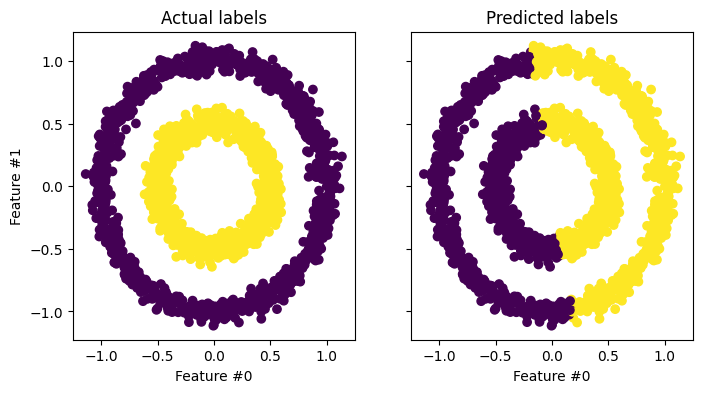

In [ ]:
_, (act_ax, pred_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

act_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
act_ax.set_ylabel("Feature #1")
act_ax.set_xlabel("Feature #0")
act_ax.set_title("Actual labels")

pred_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
pred_ax.set_xlabel("Feature #0")
_ = pred_ax.set_title("Predicted labels")

#### Multi

In [ ]:
mlp = Sequential([
    Input(shape=(2,)),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
mlp.compile(loss=BinaryCrossentropy(from_logits=False),
            optimizer=Adam(1e-4),
            metrics=['accuracy'])

In [ ]:
mlp.fit(X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.6947 - accuracy: 0.5075 - val_loss: 0.6925 - val_accuracy: 0.4956
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.5031 - val_loss: 0.6873 - val_accuracy: 0.5038
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.6847 - accuracy: 0.5144 - val_loss: 0.6824 - val_accuracy: 0.5213
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5108 - val_loss: 0.6776 - val_accuracy: 0.5175
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.6754 - accuracy: 0.5328 - val_loss: 0.6721 - val_accuracy: 0.5419
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.6695 - accuracy: 0.5644 - val_loss: 0.6654 - val_accuracy: 0.5994
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.6624 - accuracy: 0.6339 - val_loss: 0.6580 - val_accuracy: 0.6481

In [ ]:
y_pred = (mlp.predict(X_test) > 0.5).astype("int32")

63/63 [==============================] - 0s 1ms/step


In [ ]:
np.reshape(y_test, (-1,1)).shape

(2000, 1)

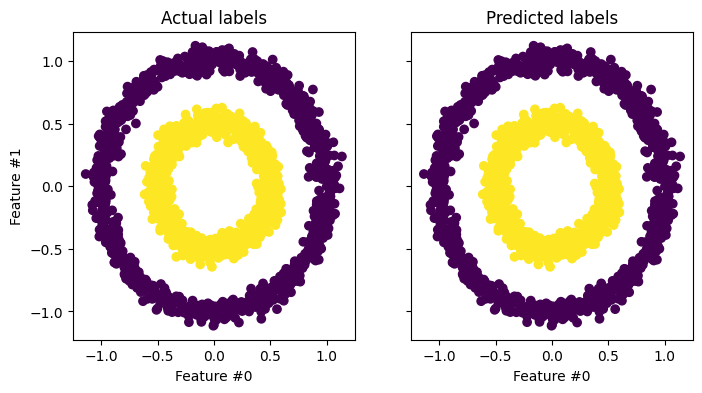

In [ ]:
_, (act_ax, pred_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

act_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
act_ax.set_ylabel("Feature #1")
act_ax.set_xlabel("Feature #0")
act_ax.set_title("Actual labels")

pred_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
pred_ax.set_xlabel("Feature #0")
_ = pred_ax.set_title("Predicted labels")

###Data for Regression

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")

In [ ]:
X = df.drop('medv', axis=1)
y = df['medv']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=12345)

In [ ]:
n_samples = 1500
random_state = 12345
X, y = make_blobs(n_samples=n_samples,
                  centers=1,
                  random_state=random_state, center_box=(0, 20))

theta = np.radians(60)
t = np.tan(theta)
shear_x = np.array(((1, t), (0, 1))).T
X_rotated = X.dot(shear_x)

In [ ]:
X_r = X_rotated[:,0]
y_r = X_rotated[:,1]

###Regression Model

####X-y Relation

In [ ]:
normalizer = Normalization(input_shape=[1,], axis=None)
normalizer.adapt(np.array(X_r))

In [ ]:
reg_model = Sequential([
          normalizer,
          Dense(32, activation='relu'),
          Dense(32, activation='relu'),
          Dense(1)
  ])

In [ ]:
reg_model.compile(loss='mean_absolute_error',
                  optimizer=Adam(1e-4))

In [ ]:
reg_hist = reg_model.fit(X_r, y_r,
              # validation_data=(X_val, y_val),
              epochs=100)

In [ ]:
def plot_reg(x, y):
  plt.scatter(X_r, y_r, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()

In [ ]:
x = tf.linspace(0.0, 40, 40)
y = reg_model.predict(x)

2/2 [==============================] - 0s 13ms/step


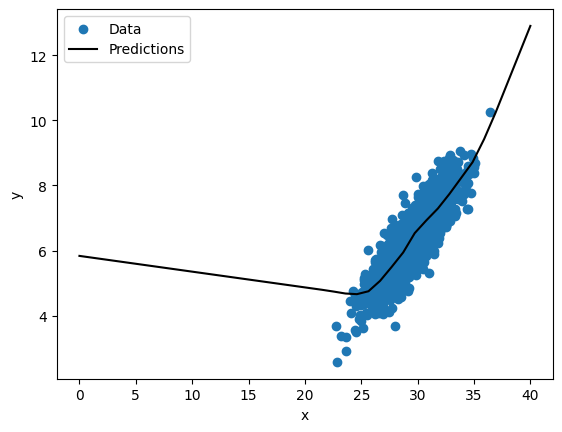

In [ ]:
plot_reg(x, y)

####Multi Input

In [ ]:
normalizer = Normalization(axis=-1)
normalizer.adapt(X_train)

In [ ]:
reg_model = Sequential([
          normalizer,
          Dense(32, activation='relu'),
          Dense(32, activation='relu'),
          Dense(1)
  ])

In [ ]:
reg_model.compile(loss='mean_absolute_error',
                  optimizer=Adam(1e-4))

In [ ]:
reg_hist = reg_model.fit(X_train, y_train,
              validation_data=(X_val, y_val),
              epochs=100)

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

In [ ]:
plot_loss(reg_hist)

### MNIST Dataset

In [ ]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

In [ ]:
def normalize_img(image, label):
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(32)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

In [ ]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(32)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

###DCNN Model

In [ ]:
cnn_model = tf.keras.models.Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
cnn_model.compile(
    optimizer=Adam(1e-4),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy'],
)

In [ ]:
cnn_model.fit(
    ds_train,
    epochs=5,
    validation_data=ds_test,
)

Epoch 1/6
1875/1875 [==============================] - 115s 57ms/step - loss: 0.3179 - accuracy: 0.9112 - val_loss: 0.1126 - val_accuracy: 0.9656
Epoch 2/6
1875/1875 [==============================] - 99s 53ms/step - loss: 0.0917 - accuracy: 0.9719 - val_loss: 0.0627 - val_accuracy: 0.9799
Epoch 3/6
1875/1875 [==============================] - 100s 53ms/step - loss: 0.0662 - accuracy: 0.9794 - val_loss: 0.0509 - val_accuracy: 0.9842
Epoch 4/6
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0535 - accuracy: 0.9837 - val_loss: 0.0513 - val_accuracy: 0.9819
Epoch 5/6
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0445 - accuracy: 0.9862 - val_loss: 0.0390 - val_accuracy: 0.9872
Epoch 6/6
1875/1875 [==============================] - 100s 53ms/step - loss: 0.0386 - accuracy: 0.9877 - val_loss: 0.0450 - val_accuracy: 0.9855
